# Support Vector Regression (SVR)

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [20]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [21]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [22]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [23]:
y = y.reshape(len(y), 1) # reshape y to a 2D array with 1 column and as many rows as y has elements (required for feature scaling)

In [24]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [25]:
# Need to apply feature scaling as the level is too small compared to the salary. (If the salary is much larger than the level, the model will ignore the level)
# Remember: Do not apply feature scaling to dummy variables.
# Remeber: Feature scaling is unnecessary when the values are binary.
# Don't want the model to ignore this feature.

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Need to have two separate scalers for X and y because they are different features. They contain different information (e.g. mean, standard deviation, etc.)

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)

In [26]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [27]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [28]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf') # Kernel's can be linear, polynomial, or gaussian (rbf). RBF is the default kernel.

regressor.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [40]:
y_scaler.inverse_transform(regressor.predict(X_scaler.transform([[6.5]])).reshape(-1,1)) # Need to scale the input value of 6.5 to the same scale as X before predicting the salary. Then need to inverse transform the predicted salary to get the original scale.

array([[170370.0204065]])

## Visualising the SVR results

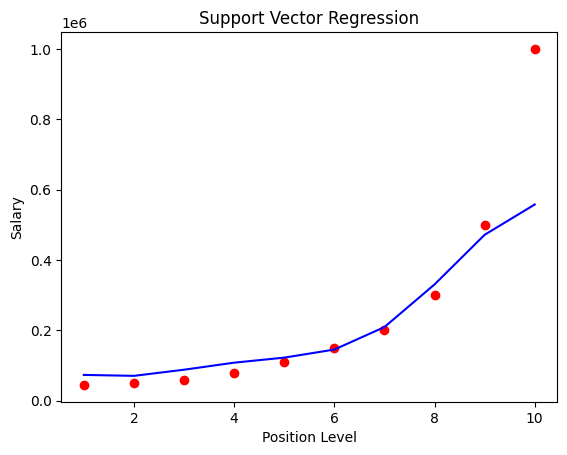

In [42]:
plt.scatter(X_scaler.inverse_transform(X), y_scaler.inverse_transform(y), color='red')

plt.plot(X_scaler.inverse_transform(X), y_scaler.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')

plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

/var/folders/kw/4x9cgyx95ls1zhzx184q21xr0000gn/T/ipykernel_72521/1490651126.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_scaler.inverse_transform(X)), max(X_scaler.inverse_transform(X)), 0.1) # this is to make the curve smoother


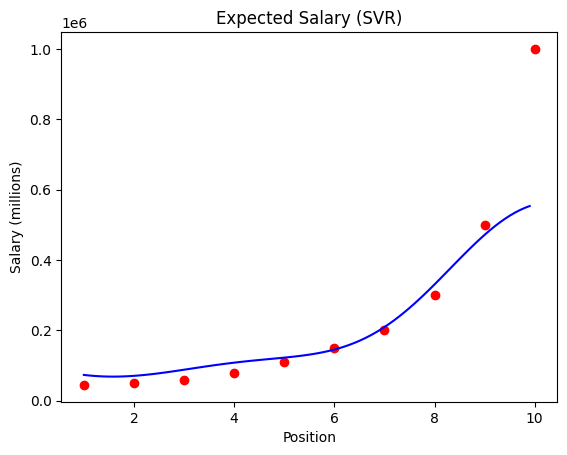

In [44]:
X_grid = np.arange(min(X_scaler.inverse_transform(X)), max(X_scaler.inverse_transform(X)), 0.1) # this is to make the curve smoother
X_grid = X_grid.reshape((len(X_grid), 1)) # reshape the array to a matrix

plt.scatter(X_scaler.inverse_transform(X), y_scaler.inverse_transform(y), color='red')
plt.plot(X_grid, y_scaler.inverse_transform(regressor.predict(X_scaler.transform(X_grid)).reshape(-1,1)), color='blue') # Need to use the polynomial features here

plt.title("Expected Salary (SVR)")
plt.xlabel("Position")
plt.ylabel("Salary (millions)")

plt.show()